<a id='intro'></a>
## Introduction

This dataset consists of information from 100,000 medical appointments in Brazil, focusing on whether patients attended their scheduled appointments. Each row includes various characteristics about the patient.

Independent variables include: 
PatientId', 'AppointmentID', 'Gender', 'ScheduledDay','AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received';And dependent variable is: 'No-show'.

The column 'ScheduledDay' indicates the date when the patient made the appointment.

The column 'Neighborhood' provides the location of the hospital where the appointment is scheduled.

The column 'Scholarship' indicates whether the patient is enrolled in the Brazilian welfare program called Bolsa Família.


The final and crucial column is 'No-show'. It contains two values: 'No', which indicates that the patient showed up for their appointment, and 'Yes', which signifies that the patient did not attend the appointment.

### Questions

1. Does different gender affect the show-up rate?
2. Does the received SMS message affect the show-up rate ?
3. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
4. Is there a positive relationship between waiting time and the probability of patients  (whose 'No-show' status is 'No') showing up for their appointments? 

In [55]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [56]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [57]:
df.shape

(110527, 14)

This patient appointment dataset contains 110527 rows and 14 columns. 

In [58]:
# check if the data has any null values or errant data
df.isnull().sum() # no null values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

This dataset doesn't have missing values.

In [59]:
# check if the data has any duplicates
sum(df.duplicated())

0

This data doesn't have duplicated rows. 

In [60]:
# check if the data has any errant data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


array([[<Axes: title={'center': 'PatientId'}>,
        <Axes: title={'center': 'AppointmentID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Scholarship'}>,
        <Axes: title={'center': 'Hipertension'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'Alcoholism'}>,
        <Axes: title={'center': 'Handcap'}>,
        <Axes: title={'center': 'SMS_received'}>]], dtype=object)

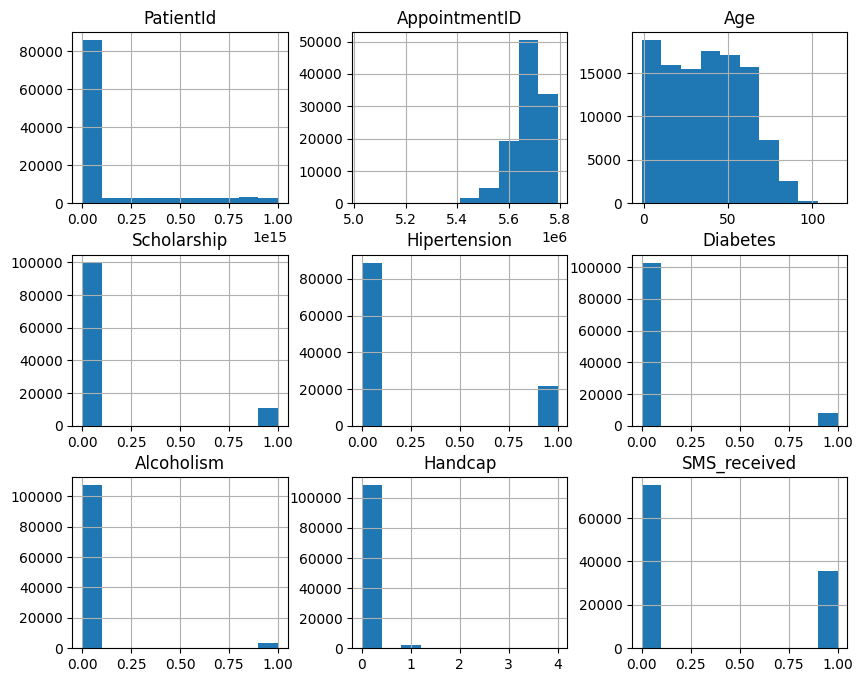

In [61]:
df.hist(figsize=(10,8))

In [62]:
df['Age'].min(),df['Age'].max()

(-1, 115)

From the histgram, the patient age in the dataset ranges from -1 (before birth) to 115. Additionally, based on the histogram analysis, all columns except the first two (ID numbers) and the age column with continuous value, the other columns only contain binary values of either 0 or 1, probably represent 'Yes' or 'No'.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [64]:
df['Gender'].value_counts()

Gender
F    71840
M    38687
Name: count, dtype: int64

In [65]:
len(df['Neighbourhood'].unique())

81

In [66]:
df['Scholarship'].value_counts()

Scholarship
0    99666
1    10861
Name: count, dtype: int64

In [67]:
df['Hipertension'].value_counts()

Hipertension
0    88726
1    21801
Name: count, dtype: int64

In [68]:
df['SMS_received'].value_counts()

SMS_received
0    75045
1    35482
Name: count, dtype: int64

In [69]:
df['No-show'].value_counts()

No-show
No     88208
Yes    22319
Name: count, dtype: int64

### Conclustion:

The dataset does not contain any missing values or duplicates. Here is a clear summary of the meaning and data types of each column:

'PatientId' and 'AppointmentID': These columns are identification numbers and are not relevant to the analysis. They can be deleted during the data cleaning step.

'Gender': This column is represented by the object data type. 'F' indicates female, and 'M' represents male.

'Age': This column is represented by the int64 data type and ranges from -1 (indicating before birth) to 115.

'Neighbourhood': This column is represented by the object data type and contains 81 different strings, representing 81 different addresses.

'Scholarship': This column is represented by the int64 data type and is a binary value (0 or 1). It indicates whether the patient is enrolled in the Brazilian welfare program.

'Hipertension', 'Diabetes', and 'Alcoholism': These columns are represented by the int64 data type and are binary values (0 or 1). They indicate whether the patient has the respective diseases.

'SMS_received': This column is represented by the int64 data type and is a binary value (0 or 1). It indicates whether the patient has received a confirmation text message on their cellphone.

'handcap': This column is represented by the int64 data type and is a binary value (0 or 1). Its meaning is not clear from the available information.

'No show': This column is represented by the object data type. 'No' means the patient attended the appointment, while 'Yes' means the patient did not attend.

## Data clearning 

In [70]:
# drop the columns that are not needed for the analysis
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [71]:
df.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 :Does different gender affect the show-up rate?

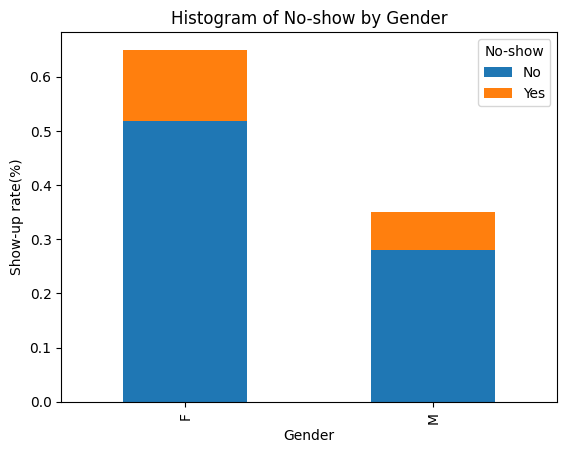

In [72]:
grouped_counts = df.groupby('Gender')['No-show'].value_counts() / df.shape[0]
df_counts = grouped_counts.reset_index(name='Percentage')
df_pivot = df_counts.pivot(index='Gender', columns='No-show', values='Percentage')

df_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Show-up rate(%)')
plt.title('Histogram of No-show by Gender')
plt.show()

**Conclustion:**

Based on the pivot figure above, it is evident that the show-up rate is influenced by gender. Specifically, a higher proportion of female patients show up for their appointments as scheduled compared to male.

### Research Question 2: Does the received SMS message affect the show-up rate ?

In [73]:
df.groupby('SMS_received')['No-show'].value_counts()

SMS_received  No-show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: count, dtype: int64

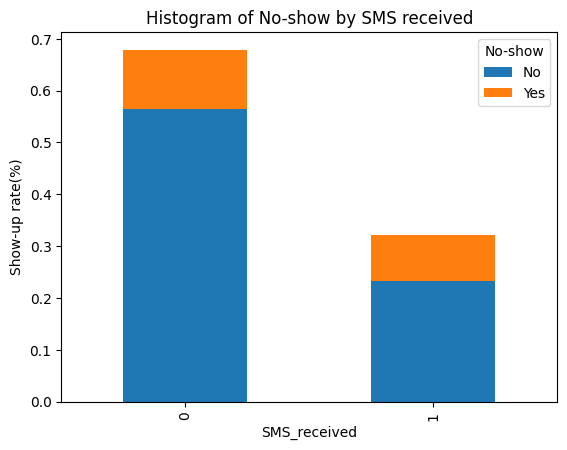

In [74]:
grouped_counts_1 = df.groupby('SMS_received')['No-show'].value_counts() / df.shape[0]
df_counts_1 = grouped_counts_1.reset_index(name='Percentage')
df_pivot_1 = df_counts_1.pivot(index='SMS_received', columns='No-show', values='Percentage')

df_pivot_1.plot(kind='bar', stacked=True)
plt.xlabel('SMS_received')
plt.ylabel('Show-up rate(%)')
plt.title('Histogram of No-show by SMS received')
plt.show()

**Conclustion:**

Assuming that a value of 1 indicates the patient received an SMS message, the analysis reveals that the SMS-received variable does influence the show-up rate. Contrary to what one might expect, a higher percentage of individuals who did not receive the SMS message attended their appointments as scheduled.

### Research Question 3 :What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [75]:
show_up_rate = df['No-show'].value_counts() / df.shape[0]
show_up_rate

No-show
No     0.798067
Yes    0.201933
Name: count, dtype: float64

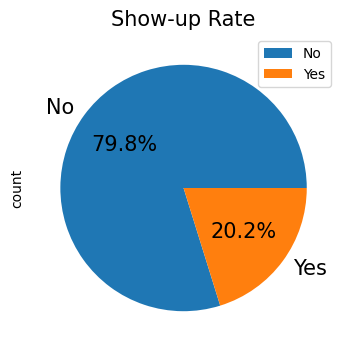

In [76]:
# draw a pie chart to show the show-up rate
plt.figure(figsize=(1,1))
show_up_rate.plot(kind='pie', figsize=(4,4), autopct='%1.1f%%', fontsize=15)
plt.title('Show-up Rate', fontsize=15)
plt.legend()
plt.show()


The pie chart reveals that 79.8% of patients attend their appointments, which means most patients will come to the clinic on time.

In order to find the most important factor which determine the patient show up at the appointment, we run the column one by one: 

In [77]:
df_show = df[df['No-show'] == 'No']
df_not_show = df[df['No-show'] == 'Yes']

1. Gender 

In [78]:
df_show['Gender'].value_counts()

Gender
F    57246
M    30962
Name: count, dtype: int64

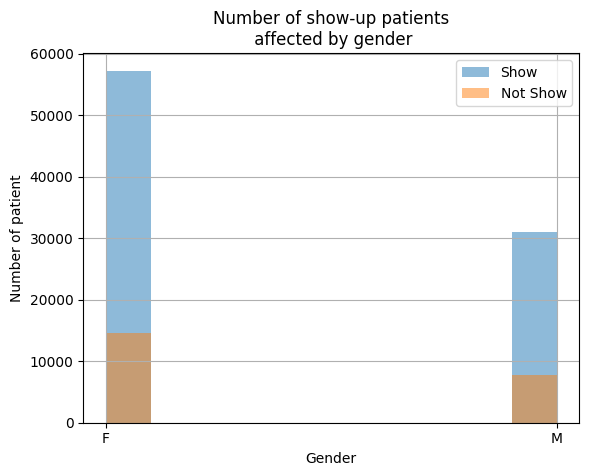

In [79]:
df_show['Gender'].hist(alpha=0.5, label='Show')
df_not_show['Gender'].hist(alpha=0.5, label='Not Show')
plt.xlabel('Gender')
plt.ylabel('Number of patient')
plt.title('Number of show-up patients\n affected by gender')
plt.legend()

Considering the gender factor determines the number of show-up patients, the histogram reveals that more female patients attend the appointment as scheduled.

2. Age:

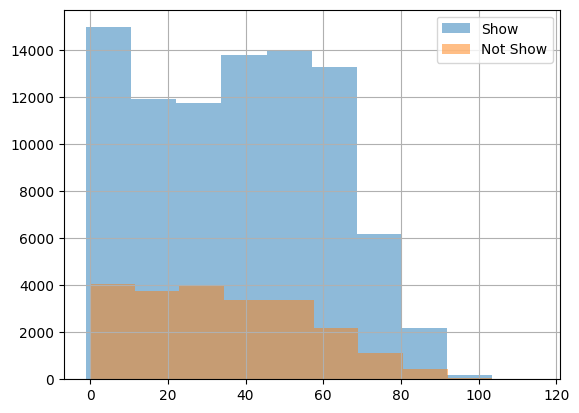

In [80]:
df_show['Age'].hist(alpha=0.5, label='Show')
df_not_show['Age'].hist(alpha=0.5, label='Not Show')
plt.legend()

In terms of age, there exhibits some differences in the distribution between the "show" and "not show" groups. Specifically, there are two age groups that stand out with a higher number of show-up patients. The first group includes patients below 10 years old, while the second group includes patients whose ages range from approximately 35 to 70 years. These findings indicate that age plays a role in the show-up rate, with these specific age ranges exhibiting a higher attendance rate.

3. Neighbourhood:

In [81]:
df['Neighbourhood'].nunique()

81

Since there are 81 different address in "Neighbourhood" columns, we only plot the top 10 number of patients in Neighbourhood. 

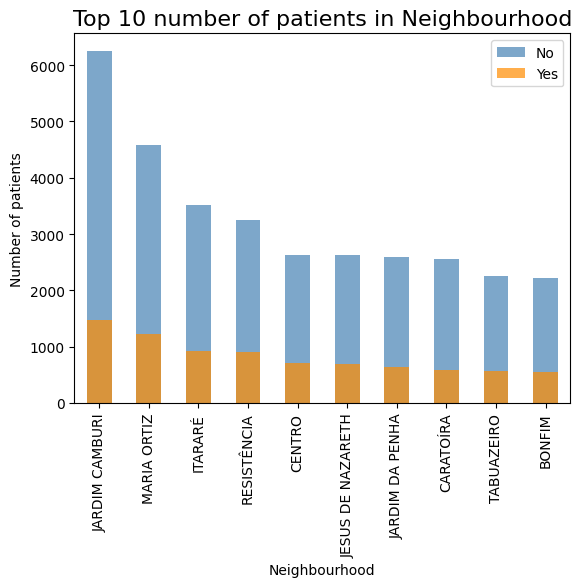

In [82]:
(df_show['Neighbourhood'].value_counts(normalize=False)).head(10).plot(kind='bar',color='steelblue', 
                                                                       alpha=0.7,label= 'No')
(df_not_show['Neighbourhood'].value_counts(normalize=False)).head(10).plot(kind='bar', color='darkorange', 
                                                                           alpha=0.7,label = 'Yes')
plt.title('Top 10 number of patients in Neighbourhood', fontsize=16)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of patients')
plt.legend()

In [83]:
df_not_show['Neighbourhood'].value_counts(normalize=False).head(1)

Neighbourhood
JARDIM CAMBURI    1465
Name: count, dtype: int64

From the analysis, it can be concluded that individuals living in JARDIM CAMBURI have the highest attendance rate for appointments, making it the top-ranked location in terms of attendance. This observation suggests that the proximity of this location to the clinic or the convenience of transportation may have an impact on the number of people who show up for their appointments. 

4. Other binary data type columns:

In [84]:
columns_to_plot = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
len(columns_to_plot)

6

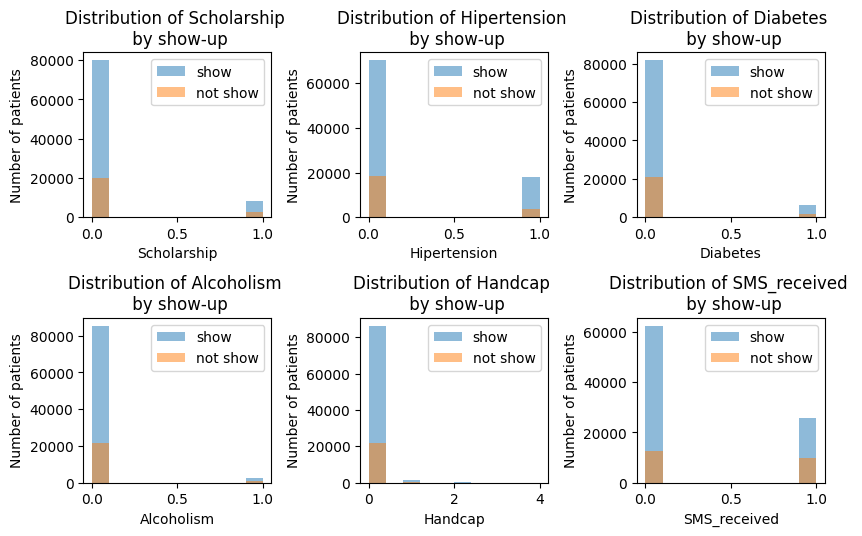

In [85]:
fig, axes = plt.subplots(nrows= 2, ncols= 3,figsize=( 1.5*len(columns_to_plot),len(columns_to_plot)))

for i, col in enumerate(columns_to_plot):
    axes.flatten()[i].hist(df_show[col], alpha=0.5, label='show')
    axes.flatten()[i].hist(df_not_show[col], alpha=0.5, label='not show')
    axes.flatten()[i].set_xlabel(col)
    axes.flatten()[i].legend()
    axes.flatten()[i].set_ylabel('Number of patients')
    axes.flatten()[i].set_title('Distribution of {} \n by show-up'.format(col))
plt.tight_layout(pad=3.0, w_pad=1.0, h_pad=1.0)
plt.show()


Based on the histogram analysis, alcoholism and handicap are the two factors that have the most significant impact on the show-up numbers. To further validate these findings, we will plot pie charts for these two factors specifically among the show-up patients.

In [86]:
def plot_pie_chart(df, col):
    print(df.columns)
    print(df[col].value_counts())
    df_rate = df[col].value_counts() / df.shape[0]
    df_rate.plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', fontsize=15)
    plt.title('Show-up Rate affected by {}'.format(col), fontsize=15)
    plt.legend()
    plt.show()

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')
Alcoholism
0    85525
1     2683
Name: count, dtype: int64


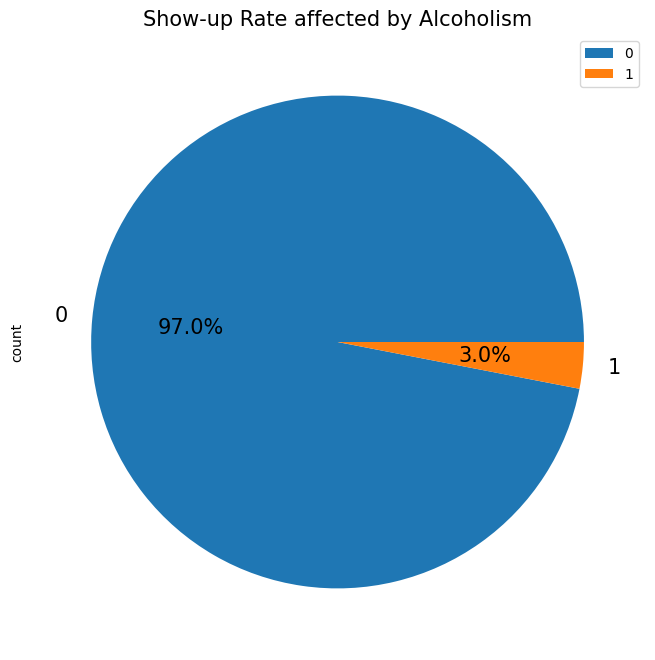

In [87]:
plot_pie_chart(df_show,'Alcoholism')

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')
Handcap
0    86374
1     1676
2      146
3       10
4        2
Name: count, dtype: int64


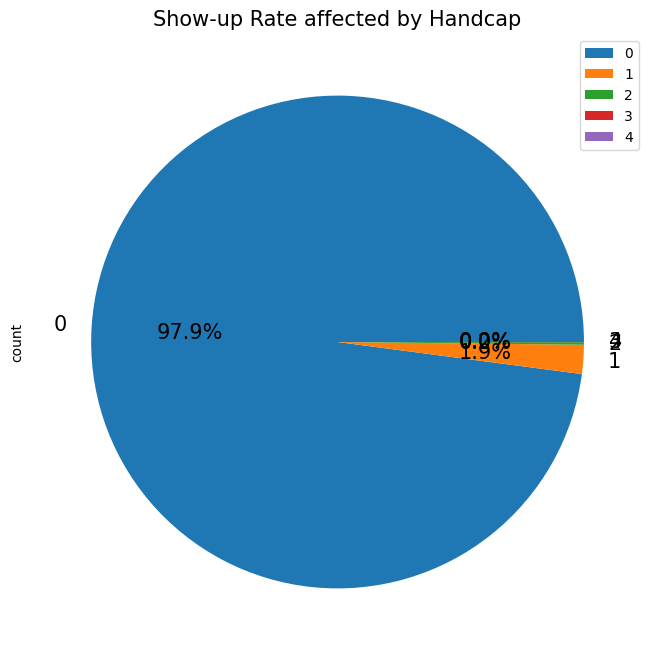

In [88]:
plot_pie_chart(df_show,'Handcap')

The pie charts reveal that among the show-up patients, 97% of individuals without alcoholism attend their appointments on time, while 97.7% of patients without a hand-cap also arrive punctually. Therefore, we can conclude that the presence of a hand-cap is a more influential factor in determining timely attendance, as it encourages a little bit higher percentage of people to come to the clinic on time compared to alcoholism.

5. time:

In [89]:
df['AppointmentDay'].value_counts().shape

(27,)

Text(0.5, 1.0, 'Show-up number patients \n affected by Appointment Day')

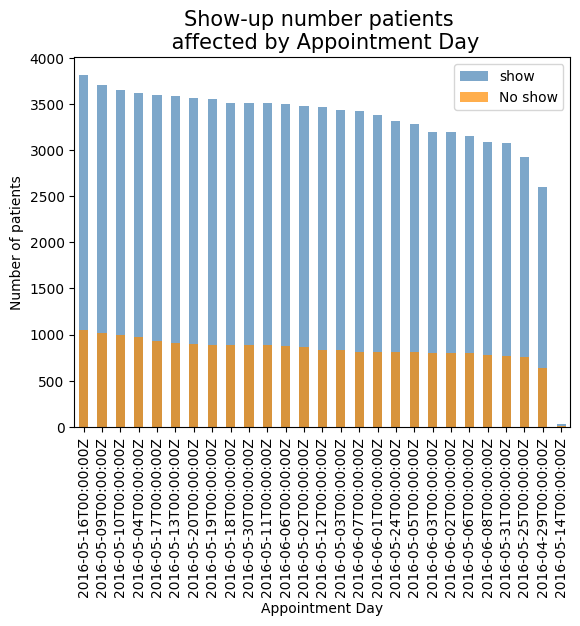

In [90]:
df_show['AppointmentDay'].value_counts().plot(kind='bar',
                                              color='steelblue', alpha=0.7,
                                              label='show')
df_not_show['AppointmentDay'].value_counts().plot(kind='bar', 
                                                  color='darkorange', alpha=0.7,
                                                  label = 'No show')
plt.xlabel('Appointment Day')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Show-up number patients \n affected by Appointment Day', fontsize=15)

Based on the plot, the majority of patients, indicated by the larger blue area, showed up for their appointments. The variations in the bars across different appointment days gradually decreased, suggesting that the specific date of the appointment did not have a significant impact on the number of patients who attended.

**Conclustion:**

Based on the above analysis, it can be concluded that gender, age, and the presence of a handicap have the most significant influence on the show-up rate of individuals. These factors play essential roles in determining the number of people who attend their appointments.

### Research Question 4: Is there a positive relationship between waiting time and the probability of patients  (whose 'No-show' status is 'No') showing up for their appointments? 

#### Explore time data

We can examine two columns: 'ScheduledDay' and 'AppointmentDay'. These columns contain time information that allows us to determine if they are ordered chronologically and understand the time range involved.

In [91]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [92]:
# Convert the 'ScheduledDay' and 'AppointmentDay' column to datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [93]:
# split the date and time
df['ScheduledDay_date'] = df['ScheduledDay'].dt.date
df['ScheduledDay_time'] = df['ScheduledDay'].dt.time
df['AppointmentDay_date'] = df['AppointmentDay'].dt.date
df['AppointmentDay_time'] = df['AppointmentDay'].dt.time

In [94]:
# remove the unnecessary columns
df = df.drop(['ScheduledDay','AppointmentDay'],axis =1)

1.Appointment Day:

In [95]:
df['AppointmentDay_date'].min(),    df['AppointmentDay_date'].max()

(datetime.date(2016, 4, 29), datetime.date(2016, 6, 8))

In [96]:
df['AppointmentDay_time'].min(),    df['AppointmentDay_time'].max()

(datetime.time(0, 0), datetime.time(0, 0))

Text(0, 0.5, 'Count')

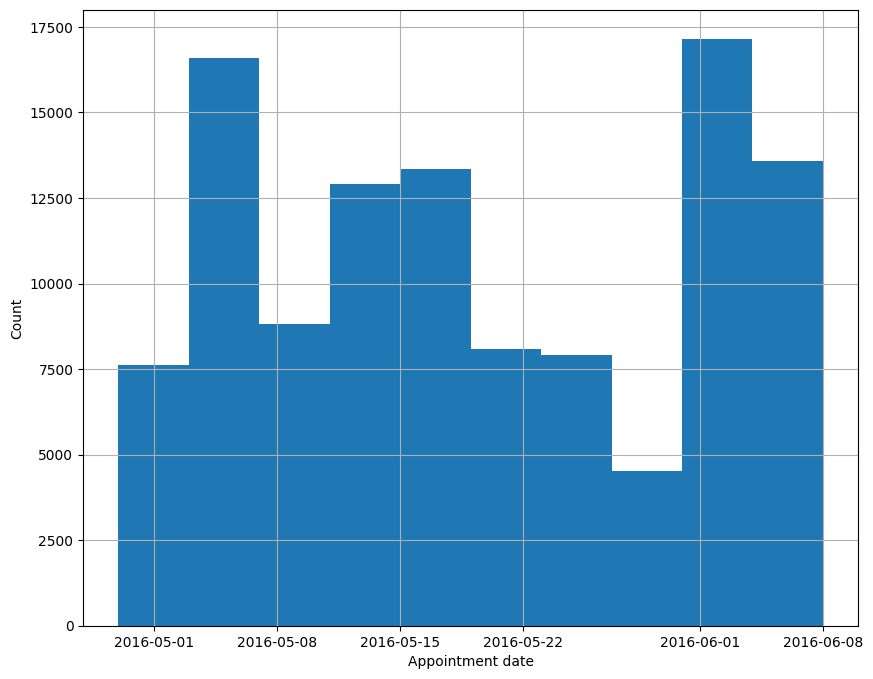

In [97]:
#plot histogram for appointment day
df['AppointmentDay_date'].hist(figsize=(10,8))
plt.xlabel('Appointment date')
plt.ylabel('Count')

The appointment date is from between the end of April and the beginning of June in 2016.

In [98]:
#plot histogram for appointment time
df['AppointmentDay_time'].unique()

array([datetime.time(0, 0)], dtype=object)

The appointment day time only has one time at 00:00.

##### 2.Scheduled date

In [99]:
#check the earliest and latest date
df['ScheduledDay_date'].min(),df['ScheduledDay_date'].max()

(datetime.date(2015, 11, 10), datetime.date(2016, 6, 8))

The scheduled day of the appointments in the dataset ranges from November 10, 2015, to June 8, 2016. 

In [100]:
# chech the earliest and latest time
df['ScheduledDay_time'].min(),df['ScheduledDay_time'].max()

(datetime.time(6, 9, 36), datetime.time(21, 27, 35))

Text(0, 0.5, 'Count')

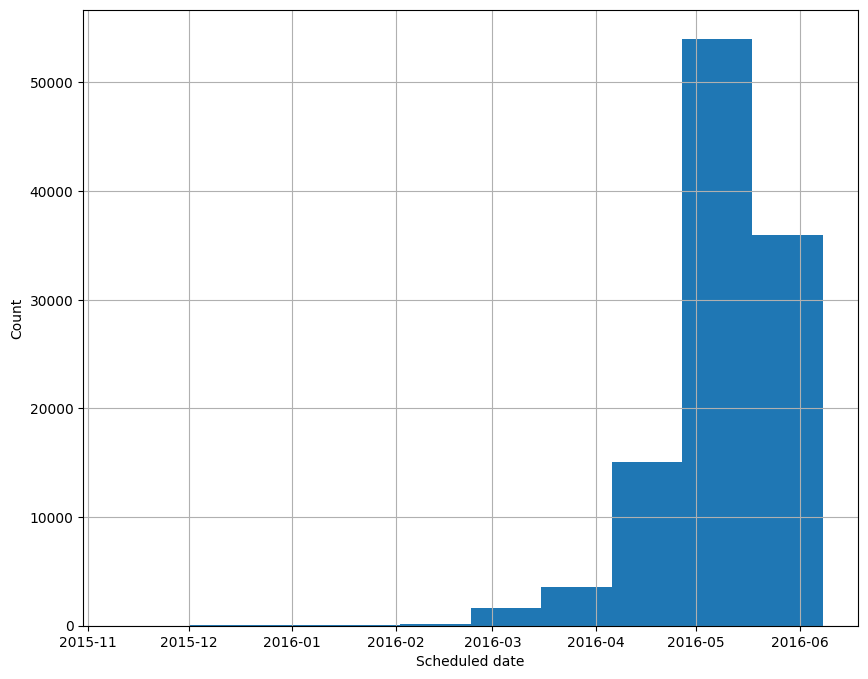

In [101]:
#plot histogram for scheduled day
df['ScheduledDay_date'].hist(figsize=(10,8))
plt.xlabel('Scheduled date')
plt.ylabel('Count')


There is a difference between the range of scheduled dates and appointment dates in the dataset. The scheduled dates range from February 2016 to June 2016, while the appointment dates start from May 2016. This indicates that there is a period of time between when the appointments were scheduled and when they actually took place.

<Axes: xlabel='ScheduledDay_time'>

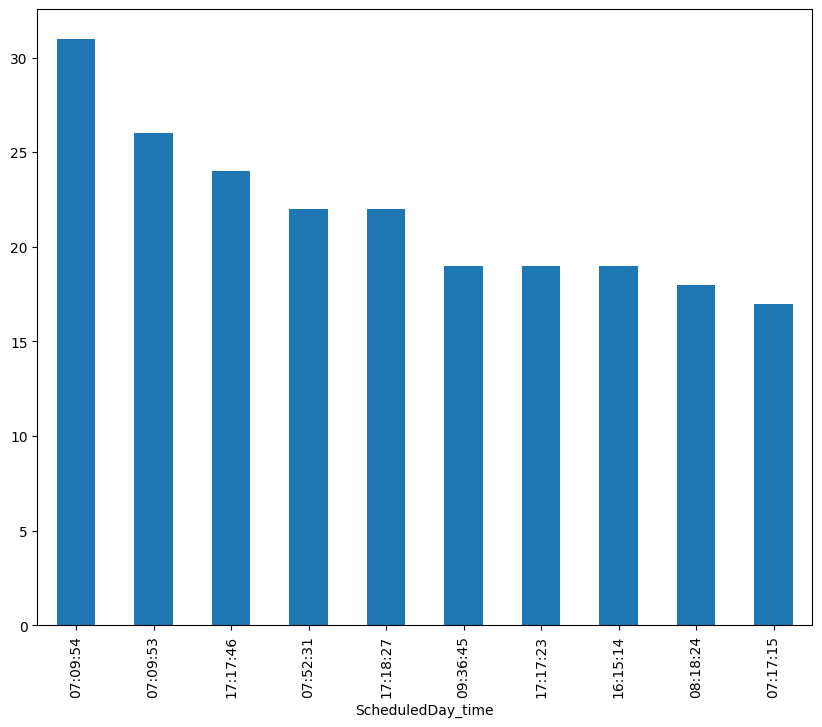

In [102]:
# plot the bar plot for the scheduled day time , since the length of data is too long,
# we will only plot the top 10
df['ScheduledDay_time'].value_counts().head(10).plot(kind='bar',figsize=(10,8))

#### Calulate the waiting time

In [103]:
df.head(3)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_date,ScheduledDay_time,AppointmentDay_date,AppointmentDay_time
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08,2016-04-29,00:00:00
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27,2016-04-29,00:00:00
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,16:19:04,2016-04-29,00:00:00


In [128]:
#calculate the waiting time
df['waiting_time'] = df['AppointmentDay_date'] - df['ScheduledDay_date']
df['waiting_time'] = df['waiting_time'].apply(lambda x: x.total_seconds() / (3600 * 24))# convert to days
df.head(1)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_date,ScheduledDay_time,AppointmentDay_date,AppointmentDay_time,waiting_time
102791,F,77,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,2015-12-07,10:43:50,2016-06-03,00:00:00,179.0


In [129]:
# sort the data by waiting time
df.sort_values(by='waiting_time',ascending=False,inplace=True)
df.head(3)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_date,ScheduledDay_time,AppointmentDay_date,AppointmentDay_time,waiting_time
102791,F,77,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,2015-12-07,10:43:50,2016-06-03,00:00:00,179.0
102789,F,60,SÃO CRISTÓVÃO,0,1,1,0,0,1,No,2015-12-07,10:44:25,2016-06-03,00:00:00,179.0
102797,F,48,MARUÍPE,0,1,1,0,0,1,No,2015-12-07,10:42:42,2016-06-03,00:00:00,179.0


In [130]:
# show the range of waiting time
df['waiting_time'].min(),df['waiting_time'].max()

(-6.0, 179.0)

The waiting time ranges from -6 days to 179 days. To create a clear histogram plot, a bin size of 7 days, representing a week, was chosen.

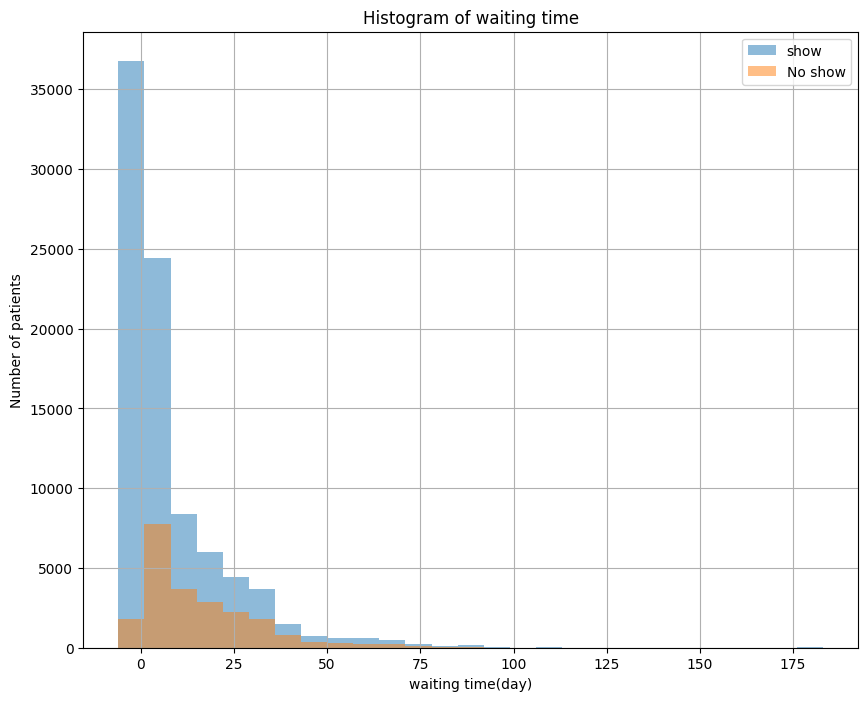

In [131]:
bin_size = 7
data = df['waiting_time']
df.groupby('No-show')['waiting_time'].hist(figsize=(10,8),alpha=0.5,
                                           bins=np.arange(min(data), max(data) + bin_size, bin_size))
plt.legend(['show','No show'])
plt.title('Histogram of waiting time')
plt.xlabel('waiting time(day)')
plt.ylabel('Number of patients')
plt.show()

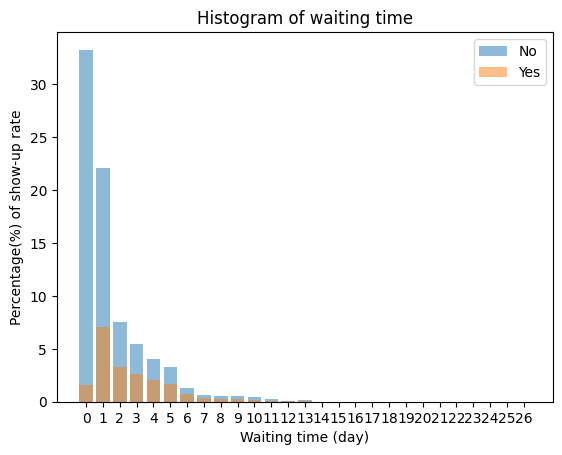

In [221]:
# change the number of patients to show-up rate 
bin_size = 7
data = df['waiting_time']

# Group the data by 'No-show' columns
grouped_data = df.groupby('No-show')['waiting_time']
# Calculate the total number of patients
total_patients = df.shape[0]

# Plot the histograms with percentages
for category, group in grouped_data:
    counts, _ = np.histogram(group, bins=np.arange(min(data), max(data) + bin_size, bin_size))
    percentages = (counts / total_patients) * 100
    plt.bar(np.arange(len(percentages)), percentages, alpha=0.5, label=category)

# Add labels, title, and legend
plt.legend()
plt.title('Histogram of waiting time')
plt.xlabel('Waiting time (day)')
plt.ylabel('Percentage(%) of show-up rate')

# Set the x-axis tick labels
plt.xticks(np.arange(len(percentages)))

# Show the plot
plt.show()


**Conclusion:** 

The histogram of waiting time, grouped by the "No-show" category, provides strong evidence that as the waiting time increases, the probability of patients not appearing for their appointment also increases. However, if the waiting time is within two weeks, it is observed that over 20% of the patients will attend the appointment.

<a id='conclusions'></a>
## Conclusions


The data analysis reveals several key findings regarding the show-up rate for appointments. Firstly, gender is a significant factor, with a higher proportion of female patients attending their appointments compared to males. Secondly, the presence of an SMS message does affect the show-up rate, as surprisingly, a higher percentage of patients who did not receive an SMS message attended their appointments as scheduled. Additionally, gender, age, and the presence of a hand-cap emerge as the most influential factors determining the show-up rate. These factors play essential roles in determining the number of individuals who attend their appointments.

Furthermore, the analysis of the histogram for waiting time demonstrates a clear trend. As the waiting time increases, there is an observed increase in the probability of patients not appearing for their appointments. However, it is noteworthy that if the waiting time is within two weeks, over 20% of the patients still attend their appointments. This suggests that managing and minimizing waiting times can positively impact the show-up rate.

However, there are several limitations to these conclusions:

1.Lack of numerical data in Neighbourhood column: The Neighbourhood column only provides the name of the address without including the distance between the patient's home and the clinic. Consequently, this feature cannot be used to analyze the influence of distance on patients' attendance and cannot yield a solid conclusion.

2.Too many categorical features: There are numerous categorical features, such as gender and binary-type columns. This abundance of categorical variables hinders the application of certain statistical analyses.

3.Unclear information of some features: The disease labeled as "hand-cap" does not have a clear definition or explanation. Although patients with this condition may have a higher show-up possibility, it cannot be utilized for further analysis due to its ambiguous nature.

4.Small sample size: The dataset only includes appointments from November 10, 2015, to June 8, 2016, with appointment dates concentrated between the end of April and the beginning of June 2016. Therefore, these conclusions can only reflect the show-up rate during this short period in 2016 and cannot represent the entire year.